### Game Experience Questionnaire Analysis

In [1]:
import pandas as pd
import numpy as np

In [5]:
geq = pd.read_csv(r'C:\Users\alisa\Desktop\uni bsc\thesis\DATA_ANALYSIS\pythonMNE_testing\processed_qual_data\allGEQ.csv')


### Component Scores - Core Module (AV & V)

In [7]:

# filtering only the core module 

core_geq = geq[geq['Module'] == 'Core'].copy()

core_geq.columns = core_geq.columns.astype(str)


# Components for analysis for the Core module of the GEQ
components = {
    'Competence':['2', '10', '15', '17', '21'],
    'Immersion': ['3', '12', '18', '19', '27', '30'],
    'Flow': ['5', '13', '25', '28', '31'],
    'Tension': ['22', '24', '29'],
    'Challenge': ['11', '23', '26', '32', '33'],
    'Negative_affect': ['7', '8', '9', '16'],
    'Positive_affect': ['1', '4', '6', '14', '20']
}

# calculating mean value for each of the components in the core module
for comp, ques in components.items():
    core_geq[comp] = core_geq[ques].astype(float).mean(axis=1) # axis=0 --> rows, axis=1 --> columns


core_components = core_geq[['Q_num', 'Condition'] + list(components.keys())]


#### Normality of the data

In [9]:
from scipy.stats import shapiro
import pandas as pd

shapiro_results = []

for condition in ['AV', 'V']:
    subset = core_components[core_components['Condition'] == condition]
    for comp in components.keys():
        stat, p = shapiro(subset[comp].dropna())
        shapiro_results.append({
            'Condition': condition,
            'Component': comp,
            'W-statistic': round(stat, 4),
            'p-value': round(p, 6)
        })

# Convert to DataFrame for easy viewing
shapiro_df = pd.DataFrame(shapiro_results)
print(shapiro_df)


   Condition        Component  W-statistic   p-value
0         AV       Competence       0.9413  0.210506
1         AV        Immersion       0.8403  0.002295
2         AV             Flow       0.9602  0.494108
3         AV          Tension       0.6450  0.000004
4         AV        Challenge       0.9136  0.055969
5         AV  Negative_affect       0.8974  0.026375
6         AV  Positive_affect       0.7294  0.000048
7          V       Competence       0.9383  0.182286
8          V        Immersion       0.9114  0.050593
9          V             Flow       0.9397  0.195445
10         V          Tension       0.4740  0.000000
11         V        Challenge       0.9182  0.069699
12         V  Negative_affect       0.9301  0.123582
13         V  Positive_affect       0.8305  0.001563


### Component Scores - Post-Game Module (AV & V)

In [ ]:
post_geq = geq[geq['Module'] == 'PostGame'].copy()
post_geq.columns = post_geq.columns.astype(str)

# Components for analysis for the Post-game module of the GEQ
post_components = {
    'Positive_Experience': ['1', '5', '7', '8', '12', '16'],
    'Negative_Experience': ['2', '4', '6', '11', '14', '15'],
    'Tiredness': ['10', '13'],
    'Returning_to_Reality': ['3', '9', '17']
}

# calculating mean value for each of the components in the core module
for comp, ques in post_components.items():
    post_geq[comp] = post_geq[ques].astype(float).mean(axis=1) 


post_components = post_geq[['Q_num', 'Condition'] + list(post_components.keys())]


#### Normality of the data

In [ ]:
from scipy.stats import shapiro
import pandas as pd


shapiro_results = []
Pcomponents = {
    'Positive_Experience': ['1', '5', '7', '8', '12', '16'],
    'Negative_Experience': ['2', '4', '6', '11', '14', '15'],
    'Tiredness': ['10', '13'],
    'Returning_to_Reality': ['3', '9', '17']
}

for condition in ['AV', 'V']:
    subset = post_components[post_components['Condition'] == condition]
    for comp in Pcomponents.keys():
        stat, p = shapiro(subset[comp].dropna())
        shapiro_results.append({
            'Condition': condition,
            'Component': comp,
            'W-statistic': round(stat, 4),
            'p-value': round(p, 6)
        })

shapiro_df = pd.DataFrame(shapiro_results)
print(shapiro_df)


  Condition             Component  W-statistic   p-value
0        AV   Positive_Experience       0.9756  0.836162
1        AV   Negative_Experience       0.4956  0.000000
2        AV             Tiredness       0.7304  0.000049
3        AV  Returning_to_Reality       0.9498  0.313291
4         V   Positive_Experience       0.9337  0.146324
5         V   Negative_Experience       0.6738  0.000009
6         V             Tiredness       0.6765  0.000010
7         V  Returning_to_Reality       0.8965  0.025294


In [14]:
from scipy.stats import ttest_rel


def paired_ttests(df, components):
    results = []

    for comp in components:
        av_scores = df[df['Condition'] == 'AV'][['Q_num', comp]].set_index('Q_num')
        v_scores = df[df['Condition'] == 'V'][['Q_num', comp]].set_index('Q_num')

        merged = av_scores.join(v_scores, lsuffix='_AV', rsuffix='_V')
        merged.dropna(inplace=True)

        t_stat, p_val = ttest_rel(merged[f'{comp}_AV'], merged[f'{comp}_V'])

        mean_av = merged[f'{comp}_AV'].mean()
        mean_v = merged[f'{comp}_V'].mean()
        std_av = merged[f'{comp}_AV'].std()
        std_v = merged[f'{comp}_V'].std()
        
        alpha = 0.05

        sig = 'Yes' if p_val < alpha else 'No'

        results.append({
            'Component':comp,
            'Mean_AV':mean_av,
            'Mean_V' :mean_v,
            'SD_AV' :std_av,
            'SD_V' :std_v,
            't' :t_stat,
            'p' :p_val,
            'Significant' :sig
        })
    
    return pd.DataFrame(results)



In [15]:
# components: core & post

core_components_list = [
    'Competence',
    'Immersion',
    'Flow',
    'Tension',
    'Challenge',
    'Negative_affect',
    'Positive_affect'
]

post_components_list = [
    'Positive_Experience',
    'Negative_Experience',
    'Tiredness',
    'Returning_to_Reality'
]


In [16]:
core_results_twoside = paired_ttests(core_components, core_components_list)
post_results_twoside = paired_ttests(post_components, post_components_list)

In [17]:
print(core_results_twoside)

         Component   Mean_AV    Mean_V     SD_AV      SD_V         t  \
0       Competence  3.054545  2.854545  0.620850  0.728160  1.945992   
1        Immersion  2.886364  2.696970  0.799117  0.961750  2.017366   
2             Flow  2.827273  2.381818  0.553071  0.806897  2.530670   
3          Tension  0.242424  0.287879  0.426401  0.722250 -0.301366   
4        Challenge  1.072727  1.036364  0.924884  0.906351  0.354876   
5  Negative_affect  0.488636  0.545455  0.340494  0.405589 -0.793884   
6  Positive_affect  3.318182  3.000000  0.734611  0.917554  2.984035   

          p Significant  
0  0.065161          No  
1  0.056619          No  
2  0.019443         Yes  
3  0.766099          No  
4  0.726222          No  
5  0.436142          No  
6  0.007075         Yes  


In [18]:
print(post_results_twoside)

              Component   Mean_AV    Mean_V     SD_AV      SD_V         t  \
0   Positive_Experience  2.386364  2.325758  0.760093  0.912113  0.601074   
1   Negative_Experience  0.037879  0.090909  0.088069  0.133405 -1.779369   
2             Tiredness  0.386364  0.681818  0.554888  1.018232 -2.025559   
3  Returning_to_Reality  1.212121  1.151515  0.586853  0.858985  0.438931   

          p Significant  
0  0.554224          No  
1  0.089658          No  
2  0.055705          No  
3  0.665194          No  


In [19]:
from scipy.stats import shapiro
import pandas as pd

def test_normality(geq_df, module_name):
    pivoted = geq_df.pivot(index='Q_num', columns='Condition')
    
    normality_results = []

    for component in [col for col in geq_df.columns if col not in ['Q_num', 'Condition']]:
        try:
            av_scores = pivoted[component]['AV']
            v_scores = pivoted[component]['V']
            differences = av_scores - v_scores

            stat, p_value = shapiro(differences.dropna())
            normality_results.append({
                'GEQ Component': component,
                'Shapiro-Wilk p': p_value,
                'Normality Violation': 'Yes' if p_value < 0.05 else 'No'
            })
        except KeyError:
            print(f"Component {component} missing in AV or V conditions.")

    results_df = pd.DataFrame(normality_results)
    return results_df

core_normality = test_normality(core_components, "Core")
post_normality = test_normality(post_components, "PostGame")

The t-test ran above was a two-sided test to investigate whether or not there is a significant difference between the game experience of the AV and V conditions. 

The following t-test is a one-sided test with the following hypotheses: 
- Null Hypothesis: AV <= V
- Alternative Hypothesis: AV > V 

This test assumes that the addition of auditory feedback and background music significantly enhances the game experience 

In [20]:
def one_sided_ttest(df, components, direction):
    results = []

    for comp in components:
        av_scores = df[df['Condition'] == 'AV'][['Q_num', comp]].set_index('Q_num')
        v_scores = df[df['Condition'] == 'V'][['Q_num', comp]].set_index('Q_num')

        merged = av_scores.join(v_scores, lsuffix='_AV', rsuffix='_V')
        merged.dropna(inplace=True)

        t_stat, p_val = ttest_rel(merged[f'{comp}_AV'], merged[f'{comp}_V'])

        if direction == 'AV_greater':
            if t_stat > 0:
                p_one_side = p_val / 2 
            
            else:
                p_one_side = 1 - (p_val / 2)
        elif direction =='V_greater':
            if t_stat < 0:
                p_one_side = p_val / 2
            else:
                p_one_side = 1 - (p_val / 2)
        else:
            raise ValueError('Implementation only supports AV_greater direction')

        mean_av = merged[f'{comp}_AV'].mean()
        mean_v = merged[f'{comp}_V'].mean()
        std_av = merged[f'{comp}_AV'].std()
        std_v = merged[f'{comp}_V'].std()

        alpha = 0.05
        sig = "Yes" if p_one_side < alpha else "No"


        results.append({
            'Component':comp,
            'Mean_AV':mean_av,
            'Mean_V' :mean_v,
            'SD_AV' :std_av,
            'SD_V' :std_v,
            't' :t_stat,
            'p' :p_one_side,
            'Significant' :sig
        })
    
    return pd.DataFrame(results)

In [21]:
core_results_onesideAV = one_sided_ttest(core_components, core_components_list, direction='AV_greater')
post_results_onesideAV = one_sided_ttest(post_components, post_components_list, direction='AV_greater')

In [22]:
print(core_results_onesideAV)

         Component   Mean_AV    Mean_V     SD_AV      SD_V         t  \
0       Competence  3.054545  2.854545  0.620850  0.728160  1.945992   
1        Immersion  2.886364  2.696970  0.799117  0.961750  2.017366   
2             Flow  2.827273  2.381818  0.553071  0.806897  2.530670   
3          Tension  0.242424  0.287879  0.426401  0.722250 -0.301366   
4        Challenge  1.072727  1.036364  0.924884  0.906351  0.354876   
5  Negative_affect  0.488636  0.545455  0.340494  0.405589 -0.793884   
6  Positive_affect  3.318182  3.000000  0.734611  0.917554  2.984035   

          p Significant  
0  0.032581         Yes  
1  0.028309         Yes  
2  0.009722         Yes  
3  0.616950          No  
4  0.363111          No  
5  0.781929          No  
6  0.003538         Yes  


In [23]:
print(post_results_onesideAV)

              Component   Mean_AV    Mean_V     SD_AV      SD_V         t  \
0   Positive_Experience  2.386364  2.325758  0.760093  0.912113  0.601074   
1   Negative_Experience  0.037879  0.090909  0.088069  0.133405 -1.779369   
2             Tiredness  0.386364  0.681818  0.554888  1.018232 -2.025559   
3  Returning_to_Reality  1.212121  1.151515  0.586853  0.858985  0.438931   

          p Significant  
0  0.277112          No  
1  0.955171          No  
2  0.972147          No  
3  0.332597          No  


In [24]:
core_results_onesideAV

,Component,Mean_AV,Mean_V,SD_AV,SD_V,t,p,Significant
0,Competence,3.054545,2.854545,0.620850,0.728160,1.945992,0.032581,Yes
1,Immersion,2.886364,2.696970,0.799117,0.961750,2.017366,0.028309,Yes
2,Flow,2.827273,2.381818,0.553071,0.806897,2.530670,0.009722,Yes
3,Tension,0.242424,0.287879,0.426401,0.722250,-0.301366,0.616950,No
4,Challenge,1.072727,1.036364,0.924884,0.906351,0.354876,0.363111,No
5,Negative_affect,0.488636,0.545455,0.340494,0.405589,-0.793884,0.781929,No
6,Positive_affect,3.318182,3.000000,0.734611,0.917554,2.984035,0.003538,Yes


In [25]:
post_results_onesideAV

,Component,Mean_AV,Mean_V,SD_AV,SD_V,t,p,Significant
0,Positive_Experience,2.386364,2.325758,0.760093,0.912113,0.601074,0.277112,No
1,Negative_Experience,0.037879,0.090909,0.088069,0.133405,-1.779369,0.955171,No
2,Tiredness,0.386364,0.681818,0.554888,1.018232,-2.025559,0.972147,No
3,Returning_to_Reality,1.212121,1.151515,0.586853,0.858985,0.438931,0.332597,No


One sided test with alternative hypothesis V > AV:

In [26]:
core_results_onesideV = one_sided_ttest(core_components, core_components_list, direction='V_greater')
post_results_onesideV = one_sided_ttest(post_components, post_components_list, direction='V_greater')

In [27]:
print(core_results_onesideV)

         Component   Mean_AV    Mean_V     SD_AV      SD_V         t  \
0       Competence  3.054545  2.854545  0.620850  0.728160  1.945992   
1        Immersion  2.886364  2.696970  0.799117  0.961750  2.017366   
2             Flow  2.827273  2.381818  0.553071  0.806897  2.530670   
3          Tension  0.242424  0.287879  0.426401  0.722250 -0.301366   
4        Challenge  1.072727  1.036364  0.924884  0.906351  0.354876   
5  Negative_affect  0.488636  0.545455  0.340494  0.405589 -0.793884   
6  Positive_affect  3.318182  3.000000  0.734611  0.917554  2.984035   

          p Significant  
0  0.967419          No  
1  0.971691          No  
2  0.990278          No  
3  0.383050          No  
4  0.636889          No  
5  0.218071          No  
6  0.996462          No  


In [28]:
print(post_results_onesideV)

              Component   Mean_AV    Mean_V     SD_AV      SD_V         t  \
0   Positive_Experience  2.386364  2.325758  0.760093  0.912113  0.601074   
1   Negative_Experience  0.037879  0.090909  0.088069  0.133405 -1.779369   
2             Tiredness  0.386364  0.681818  0.554888  1.018232 -2.025559   
3  Returning_to_Reality  1.212121  1.151515  0.586853  0.858985  0.438931   

          p Significant  
0  0.722888          No  
1  0.044829         Yes  
2  0.027853         Yes  
3  0.667403          No  


## Summary of T-test findings 
two-sided t-test: 
- significant difference between AV-V for positive affect and flow 

one-sided t-test: hypothesis AV > V 
- significant difference for competence, immersion, flow & positive affect 
- no significant difference in post-module 

one-sided t-test: hypothesis V > AV 
- no significant difference in core-module 
- significant difference in post-module for Negative Experience and Tiredness 

The outcomes of these tests indicate that the AV version of the game does signficantly enhance the game experience for some of the core components of the GEQ. the one-sided test with the AV-direction indicates this for the Competence, Immersion, Flow and Positive Affect components. Conversely, the one-sided t-test with the V-direction indicates a signficiant difference for two of the components of the post-game module: Tiredness and Negative Experience. This suggests that the participants may have experienced a greater feeling of tiredness and negative experience following the visual-only condition, while experiencing greater immersion, flow and competence in the audio-visual version. 

### Plots of the GEQ Responses 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
core_melt = pd.melt(core_components,
                    id_vars=['Q_num', 'Condition'],
                    value_vars=core_components_list,
                    var_name='Component', value_name='Score'
                    )

post_melt = pd.melt(post_components,
                    id_vars=['Q_num', 'Condition'],
                    value_vars=post_components_list,
                    var_name='Component', value_name='Score'
                    )

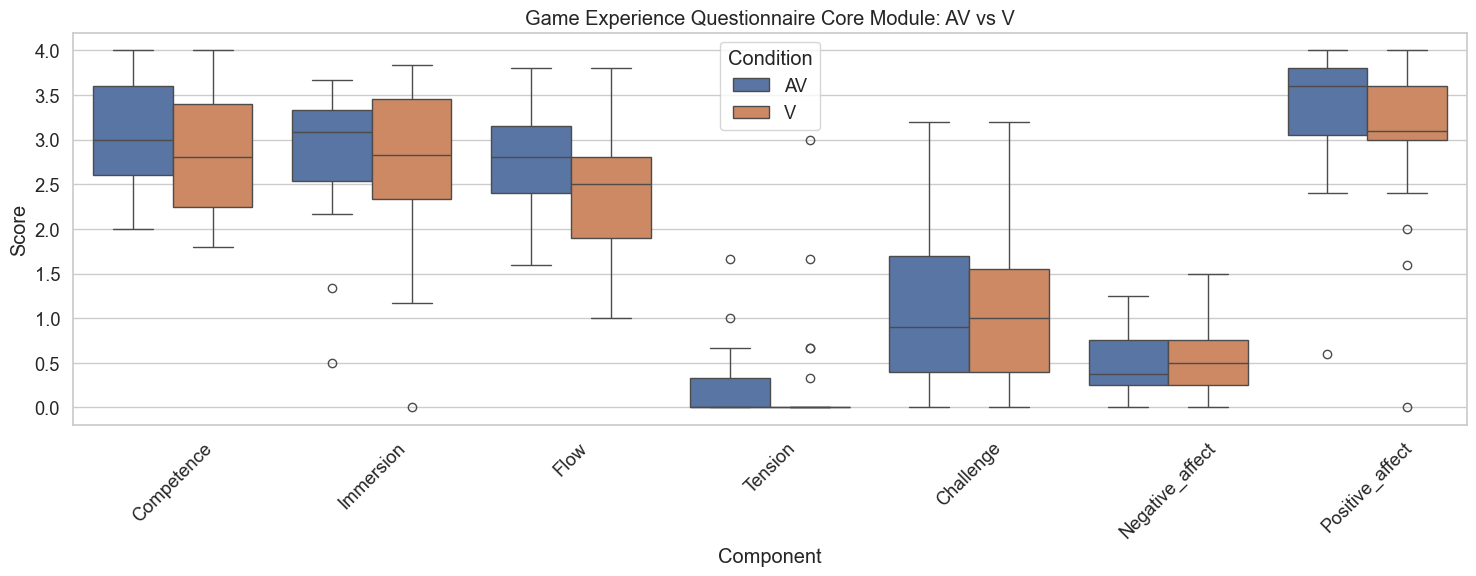

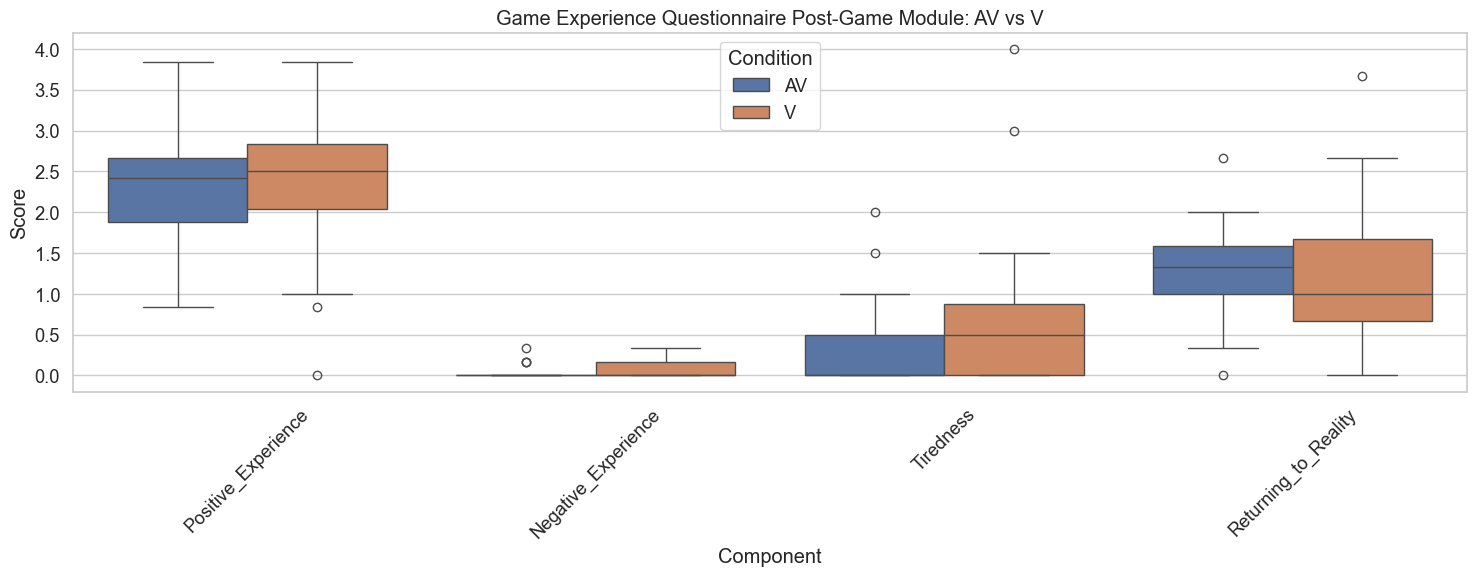

In [31]:
sns.set_theme(style='whitegrid', font_scale=1.2)

def plot_module(data, title):
    plt.figure(figsize=(15,6))
    sns.boxplot(data=data, x='Component', y='Score', hue='Condition')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_module(core_melt, 'Game Experience Questionnaire Core Module: AV vs V')
plot_module(post_melt, 'Game Experience Questionnaire Post-Game Module: AV vs V')

Plots with signficance stars 

In [32]:
# zipping the t-test outcomes to use in the plotting 

core_signif_dict = dict(zip(
    core_results_onesideAV['Component'],
    core_results_onesideAV['p']
))

post_signif_dict = dict(zip(
    post_results_onesideAV['Component'],
    post_results_onesideAV['p']
))

In [33]:
sns.set_theme(style='whitegrid', font_scale=1.3, rc={"axes.facecolor" : 'white'})

def pval_to_label(p):
    if p < 0.001:
        return 'p < 0.001'
    elif p < 0.01:
        return 'p < 0.01'
    elif p < 0.05:
        return 'p < 0.05'
    else:
        return 'n.s.'
    

def plot_module_w_sig(data, pvals_dict, title):
    plt.figure(figsize=(15, 6))
    ax = sns.boxplot(data=data, x='Component', y='Score', hue='Condition')#, palette='Set2')
    plt.title(title)
    plt.xticks(rotation=45)

    for i, component in enumerate(data['Component'].unique()):
        pval = pvals_dict.get(component, 1)
        label = pval_to_label(pval)

        y_max = data[data['Component'] == component]['Score'].max()
        y = y_max + 0.2
        x = i 
        plt.text(x, y, label, ha='center', va='bottom', fontsize=16)
    
    plt.ylim(0, data['Score'].max()+1)
    plt.tight_layout
    plt.show()

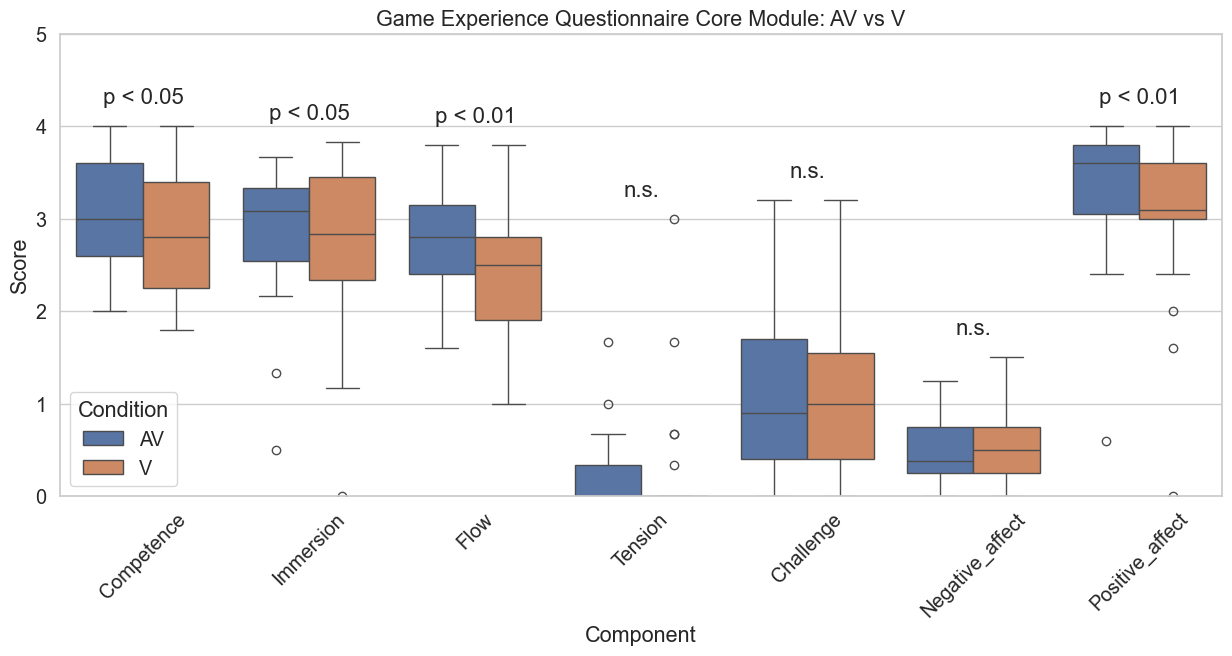

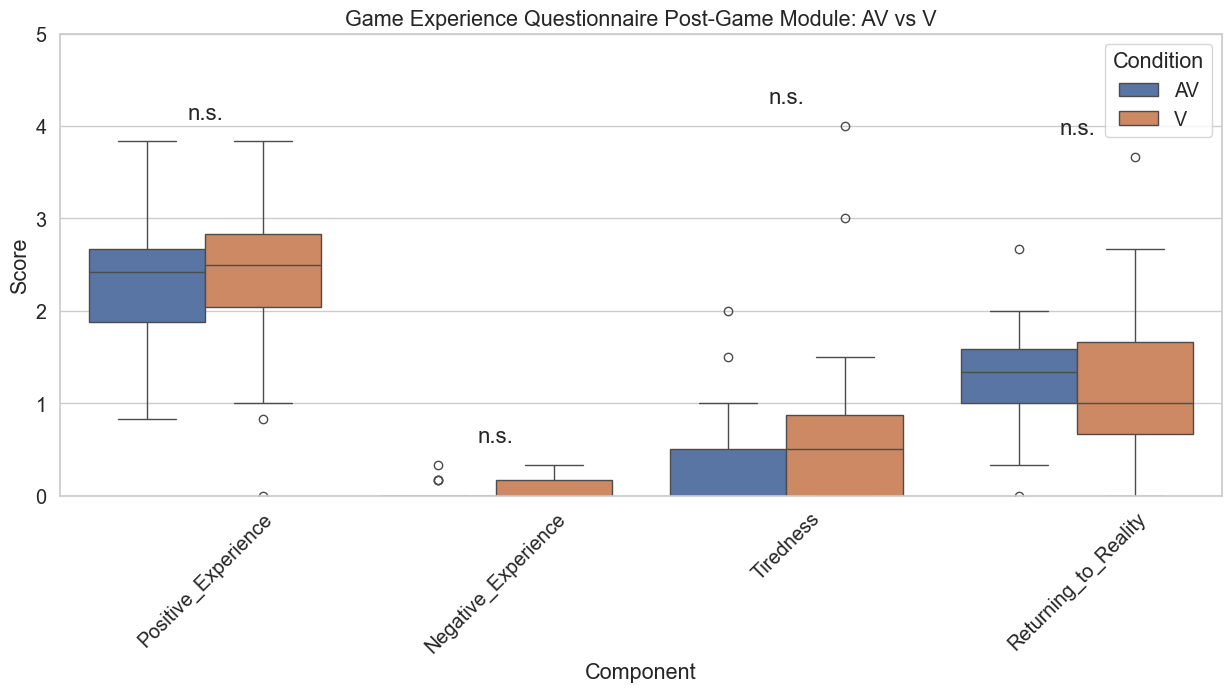

In [34]:
plot_module_w_sig(core_melt, core_signif_dict, 'Game Experience Questionnaire Core Module: AV vs V')
plot_module_w_sig(post_melt, post_signif_dict, 'Game Experience Questionnaire Post-Game Module: AV vs V')

## Further Analysis 

#### Cohen's dz
The sign of Cohen’s d indicates direction:
- Positive dz : AV condition has higher scores than V condition.

- Negative dz : AV condition has lower scores than V condition.

In [35]:
def cohens_dz(df, components):
    results = []

    for comp in components:
        av_scores = df[df['Condition'] == 'AV'][['Q_num', comp]].set_index('Q_num')
        v_scores = df[df['Condition'] == 'V'][['Q_num', comp]].set_index('Q_num')

        merged = av_scores.join(v_scores, lsuffix='_AV', rsuffix='_V')
        merged.dropna(inplace=True)

        diff = merged[f'{comp}_AV'] - merged[f'{comp}_V']

        mean_diff = diff.mean()
        sd_diff = diff.std(ddof=1)

        cohens_d = mean_diff / sd_diff

        if cohens_d < 0:
                condition = 'V'
        else: 
            condition = 'AV'

        if 0.2 <= abs(cohens_d) < 0.5:
            effect_size = 'small'
        elif 0.5 <= abs(cohens_d) < 0.8:
            effect_size = 'moderate'
        elif 0.8 <= abs(cohens_d):
            effect_size = 'large'
        else: 
            effect_size = None

        results.append({
            'Component':comp,
            'Cohens dz':cohens_d,
            'Effect Size' :effect_size,
            'Which Condition had higher effect' :condition
        })
    
    return pd.DataFrame(results)

In [36]:
core_cohens_dz = cohens_dz(core_components, core_components_list)
post_cohens_dz = cohens_dz(post_components, post_components_list)


In [37]:
print(core_cohens_dz)

         Component  Cohens dz Effect Size Which Condition had higher effect
0       Competence   0.414887       small                                AV
1        Immersion   0.430104       small                                AV
2             Flow   0.539541    moderate                                AV
3          Tension  -0.064252        None                                 V
4        Challenge   0.075660        None                                AV
5  Negative_affect  -0.169257        None                                 V
6  Positive_affect   0.636198    moderate                                AV


In [38]:
print(post_cohens_dz)

              Component  Cohens dz Effect Size  \
0   Positive_Experience   0.128149        None   
1   Negative_Experience  -0.379363       small   
2             Tiredness  -0.431851       small   
3  Returning_to_Reality   0.093580        None   

  Which Condition had higher effect  
0                                AV  
1                                 V  
2                                 V  
3                                AV  


### Paired-line Plots 

In [39]:
def paired_plots(df, components, title):
    n_cols = 3
    n_rows = int(np.ceil(len(components) / n_cols))

    ylim = (0,5)


    plt.figure(figsize=(5 * n_cols, 4* n_rows))
    
    for i, comp in enumerate(components, 1):
        plt.subplot(n_cols, n_rows, i)

        for inx, row in df.iterrows():
            plt.plot(['V', 'AV'], [row[f'{comp}_V'], row[f'{comp}_AV']], marker='o', color='black', alpha=0.6)

        plt.title(comp)
        plt.ylabel("Score")
        plt.ylim(ylim)
        plt.yticks(np.arange(ylim[0], ylim[1]+1, 1))
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


In [40]:
core_av = core_components[core_components['Condition'] == 'AV'].set_index('Q_num')
core_v = core_components[core_components['Condition'] == 'V'].set_index('Q_num')
core_long = core_av.join(core_v, lsuffix='_AV', rsuffix='_V').reset_index()

post_av = post_components[post_components['Condition'] == 'AV'].set_index('Q_num')
post_v = post_components[post_components['Condition'] == 'V'].set_index('Q_num')
post_long = post_av.join(post_v, lsuffix='_AV', rsuffix='_V').reset_index()

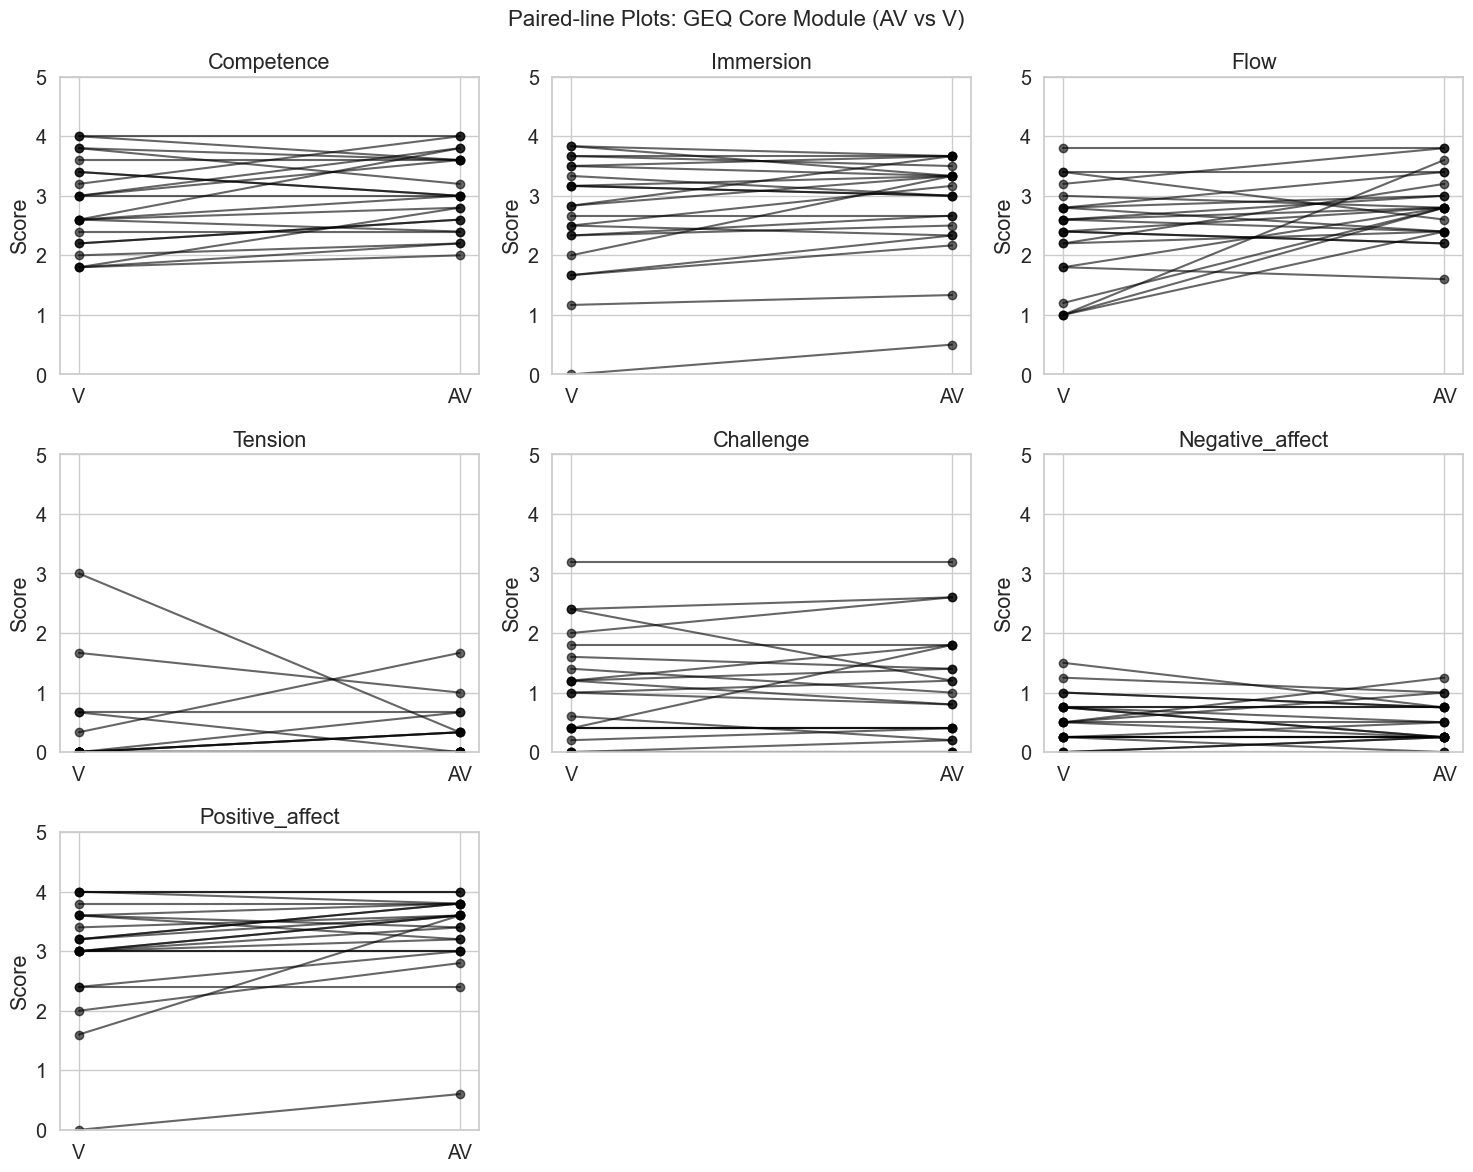

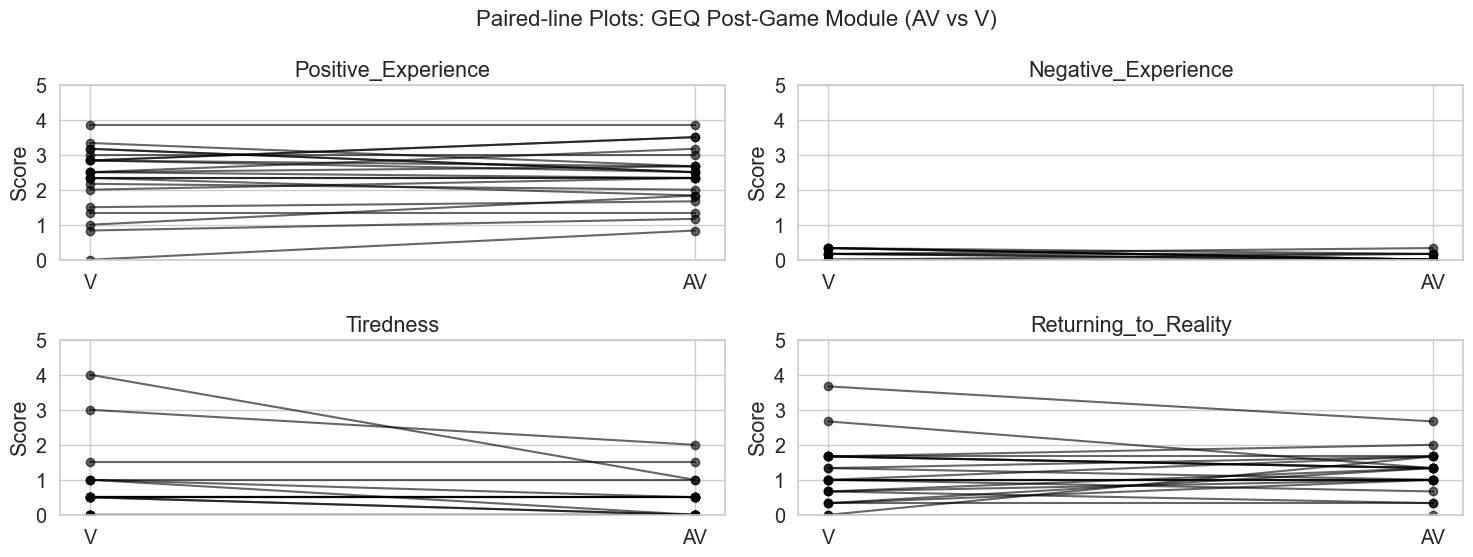

In [41]:
paired_plots(core_long, core_components_list, "Paired-line Plots: GEQ Core Module (AV vs V)")
paired_plots(post_long, post_components_list, "Paired-line Plots: GEQ Post-Game Module (AV vs V)")

## Added analysis - wilcoxon signed rank test because data is not normal

In [42]:
from scipy.stats import shapiro

def run_shapiro_tests(df, components):
    results = []
    for condition in ['AV', 'V']:
        subset = df[df['Condition'] == condition]
        for comp in components:
            stat, p = shapiro(subset[comp])
            results.append({
                'Condition': condition,
                'Component': comp,
                'W-statistic': round(stat, 4),
                'p-value': round(p, 6)
            })
    return pd.DataFrame(results)

# Run Shapiro-Wilk tests on core and post components
core_components_list = ['Competence', 'Immersion', 'Flow', 'Tension', 'Challenge', 'Negative_affect', 'Positive_affect']
post_components_list = ['Positive_Experience', 'Negative_Experience', 'Tiredness', 'Returning_to_Reality']

print("Shapiro-Wilk Test for Core Components:")
display(run_shapiro_tests(core_components, core_components_list))

print("Shapiro-Wilk Test for Post Components:")
display(run_shapiro_tests(post_components, post_components_list))

Shapiro-Wilk Test for Core Components:


,Condition,Component,W-statistic,p-value
0,AV,Competence,0.9413,0.210506
1,AV,Immersion,0.8403,0.002295
2,AV,Flow,0.9602,0.494108
3,AV,Tension,0.6450,0.000004
4,AV,Challenge,0.9136,0.055969
5,AV,Negative_affect,0.8974,0.026375
6,AV,Positive_affect,0.7294,0.000048
7,V,Competence,0.9383,0.182286
8,V,Immersion,0.9114,0.050593
9,V,Flow,0.9397,0.195445


Shapiro-Wilk Test for Post Components:


,Condition,Component,W-statistic,p-value
0,AV,Positive_Experience,0.9756,0.836162
1,AV,Negative_Experience,0.4956,0.000000
2,AV,Tiredness,0.7304,0.000049
3,AV,Returning_to_Reality,0.9498,0.313291
4,V,Positive_Experience,0.9337,0.146324
5,V,Negative_Experience,0.6738,0.000009
6,V,Tiredness,0.6765,0.000010
7,V,Returning_to_Reality,0.8965,0.025294


### two-tailed Wilcoxon signed rank test

In [43]:
from scipy.stats import wilcoxon

def run_wilcoxon_tests(df, components):
    results = []
    for comp in components:
        av = df[df['Condition'] == 'AV'][comp].values
        v = df[df['Condition'] == 'V'][comp].values
        if len(av) == len(v):
            stat, p = wilcoxon(av, v)
            results.append({
                'Component': comp,
                'W-statistic': round(stat, 4),
                'p-value': round(p, 6)
            })
    return pd.DataFrame(results)

# Run Wilcoxon signed-rank tests on core and post components
print("Wilcoxon Test for Core Components:")
display(run_wilcoxon_tests(core_components, core_components_list))

print("Wilcoxon Test for Post Components:")
display(run_wilcoxon_tests(post_components, post_components_list))


Wilcoxon Test for Core Components:


,Component,W-statistic,p-value
0,Competence,44.5,0.072867
1,Immersion,59.0,0.083492
2,Flow,48.0,0.033064
3,Tension,17.5,0.943838
4,Challenge,48.5,0.801349
5,Negative_affect,39.5,0.399540
6,Positive_affect,14.0,0.005092


Wilcoxon Test for Post Components:


,Component,W-statistic,p-value
0,Positive_Experience,64.5,0.568639
1,Negative_Experience,6.0,0.083265
2,Tiredness,0.0,0.025597
3,Returning_to_Reality,60.0,0.678404


### One-sided: av > v 

In [44]:
from scipy.stats import wilcoxon

def run_wilcoxon_tests_one_sidedAV(df, components):
    results = []
    for comp in components:
        av = df[df['Condition'] == 'AV'][comp].values
        v = df[df['Condition'] == 'V'][comp].values
        if len(av) == len(v):
            stat, p = wilcoxon(av, v, alternative='greater')
            results.append({
                'Component': comp,
                'W-statistic': round(stat, 4),
                'p-value (AV > V)': round(p, 6)
            })
    return pd.DataFrame(results)

# Run one-sided Wilcoxon signed-rank tests (AV > V) on core and post components
print("One-sided Wilcoxon Test for Core Components (AV > V):")
display(run_wilcoxon_tests_one_sidedAV(core_components, core_components_list))

print("One-sided Wilcoxon Test for Post Components (AV > V):")
display(run_wilcoxon_tests_one_sidedAV(post_components, post_components_list))


One-sided Wilcoxon Test for Core Components (AV > V):


,Component,W-statistic,p-value (AV > V)
0,Competence,126.5,0.036434
1,Immersion,151.0,0.041746
2,Flow,162.0,0.016532
3,Tension,17.5,0.528081
4,Challenge,56.5,0.400674
5,Negative_affect,39.5,0.800230
6,Positive_affect,122.0,0.002546


One-sided Wilcoxon Test for Post Components (AV > V):


,Component,W-statistic,p-value (AV > V)
0,Positive_Experience,88.5,0.284320
1,Negative_Experience,6.0,0.958368
2,Tiredness,0.0,0.987202
3,Returning_to_Reality,76.0,0.339202


### one sided: v > av 

In [45]:
from scipy.stats import wilcoxon

def run_wilcoxon_tests_one_sidedV(df, components):
    results = []
    for comp in components:
        av = df[df['Condition'] == 'AV'][comp].values
        v = df[df['Condition'] == 'V'][comp].values
        if len(av) == len(v):
            stat, p = wilcoxon(av, v, alternative='less')
            results.append({
                'Component': comp,
                'W-statistic': round(stat, 4),
                'p-value (V > AV)': round(p, 6)
            })
    return pd.DataFrame(results)

# Run one-sided Wilcoxon signed-rank tests (V > AV) on core and post components
print("One-sided Wilcoxon Test for Core Components (V > AV):")
display(run_wilcoxon_tests_one_sidedV(core_components, core_components_list))

print("One-sided Wilcoxon Test for Post Components (V > AV):")
display(run_wilcoxon_tests_one_sidedV(post_components, post_components_list))


One-sided Wilcoxon Test for Core Components (V > AV):


,Component,W-statistic,p-value (V > AV)
0,Competence,126.5,0.963566
1,Immersion,151.0,0.958254
2,Flow,162.0,0.983468
3,Tension,17.5,0.471919
4,Challenge,56.5,0.599326
5,Negative_affect,39.5,0.199770
6,Positive_affect,122.0,0.997454


One-sided Wilcoxon Test for Post Components (V > AV):


,Component,W-statistic,p-value (V > AV)
0,Positive_Experience,88.5,0.715680
1,Negative_Experience,6.0,0.041632
2,Tiredness,0.0,0.012798
3,Returning_to_Reality,76.0,0.660798


In [46]:
wilcoxon_core_results_onesideAV = run_wilcoxon_tests_one_sidedAV(core_components, core_components_list)
wilcoxon_post_results_onesideAV = run_wilcoxon_tests_one_sidedAV(post_components, post_components_list)

wilcoxon_core_results_onesideAV['p-value (AV > V)']

0    0.036434
1    0.041746
2    0.016532
3    0.528081
4    0.400674
5    0.800230
6    0.002546
Name: p-value (AV > V), dtype: float64

### Wilcoxon Plots with signficance stars 

In [47]:
# zipping the t-test outcomes to use in the plotting 

Wcore_signif_dict = dict(zip(
    wilcoxon_core_results_onesideAV['Component'],
    wilcoxon_core_results_onesideAV['p-value (AV > V)']
))

Wpost_signif_dict = dict(zip(
    wilcoxon_post_results_onesideAV['Component'],
    wilcoxon_post_results_onesideAV['p-value (AV > V)']
))

core_melt = pd.melt(core_components,
                    id_vars=['Q_num', 'Condition'],
                    value_vars=core_components_list,
                    var_name='Component', value_name='Score'
                    )

post_melt = pd.melt(post_components,
                    id_vars=['Q_num', 'Condition'],
                    value_vars=post_components_list,
                    var_name='Component', value_name='Score'
                    )

In [48]:
sns.set_theme(style='whitegrid', font_scale=1.3, rc={"axes.facecolor" : 'white'})

def pval_to_label(p):
    if p < 0.001:
        return 'p < 0.001'
    elif p < 0.01:
        return 'p < 0.01'
    elif p < 0.05:
        return 'p < 0.05'
    else:
        return 'n.s.'
    

def plot_module_w_sig(data, pvals_dict, title):
    plt.figure(figsize=(15, 6))
    ax = sns.boxplot(data=data, x='Component', y='Score', hue='Condition')#, palette='Set2')
    plt.title(title)
    plt.xticks(rotation=45)

    for i, component in enumerate(data['Component'].unique()):
        pval = pvals_dict.get(component, 1)
        label = pval_to_label(pval)

        y_max = data[data['Component'] == component]['Score'].max()
        y = y_max + 0.2
        x = i 
        plt.text(x, y, label, ha='center', va='bottom', fontsize=16)
    
    plt.ylim(-0.5, data['Score'].max()+1)
    plt.tight_layout
    plt.show()

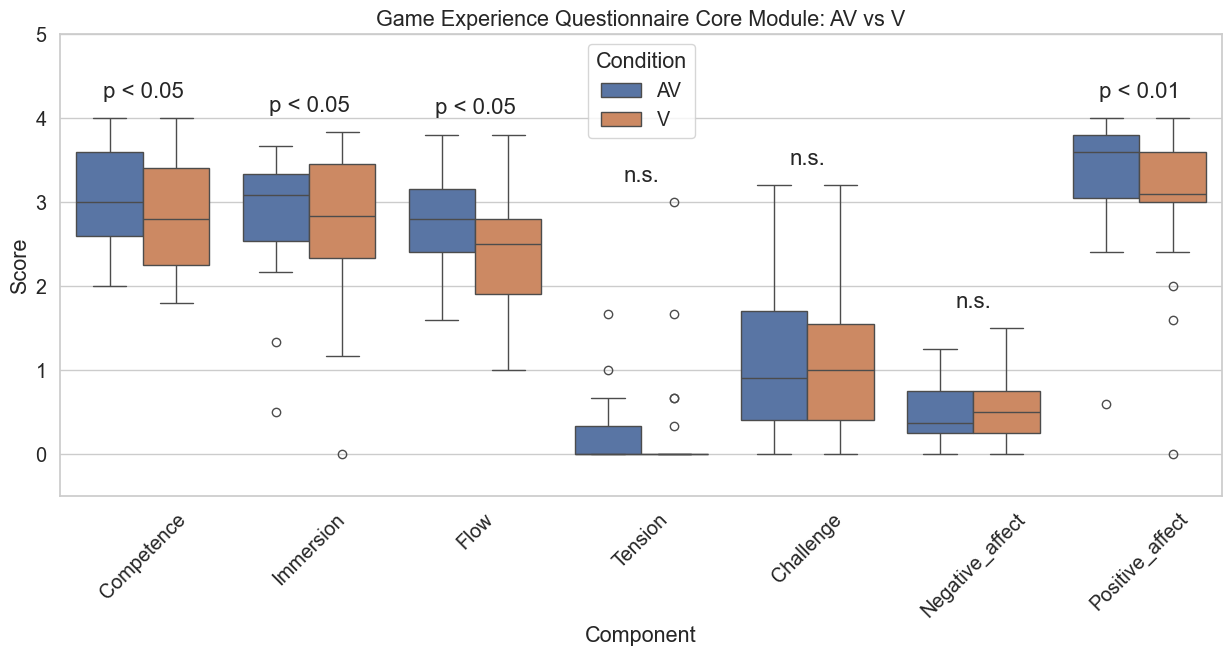

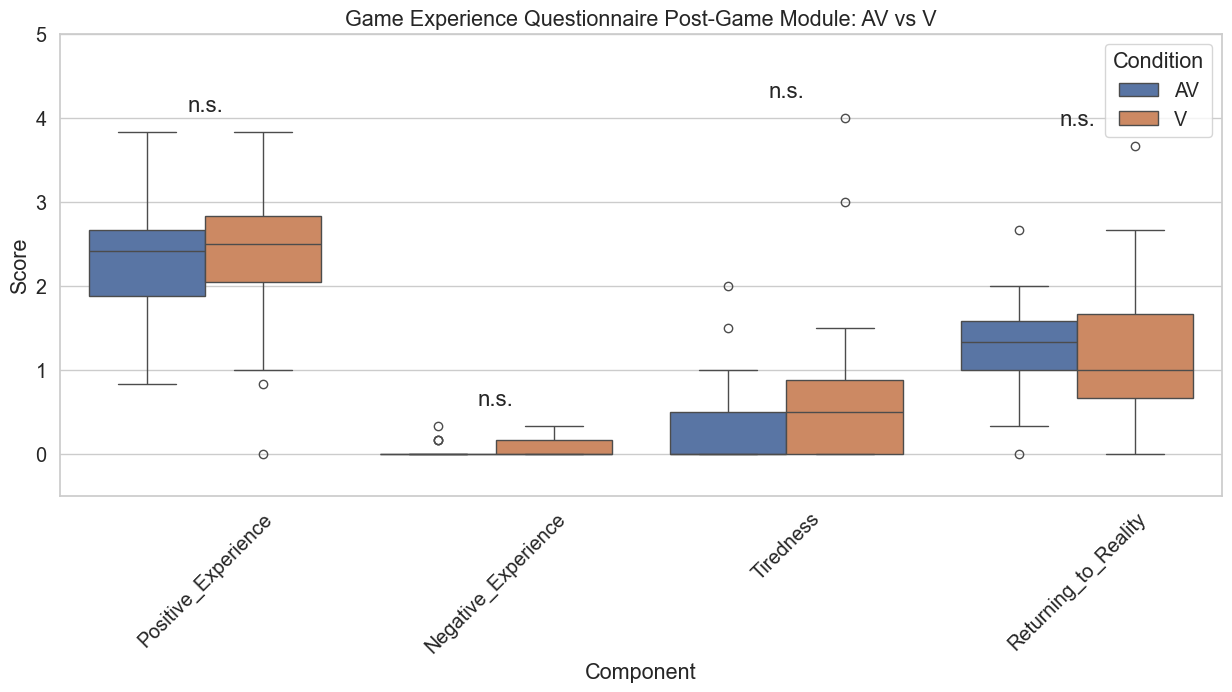

In [49]:
plot_module_w_sig(core_melt, Wcore_signif_dict, 'Game Experience Questionnaire Core Module: AV vs V')
plot_module_w_sig(post_melt, Wpost_signif_dict, 'Game Experience Questionnaire Post-Game Module: AV vs V')

Effect size for wilcoxon 

In [50]:
import pingouin as pg

def wilcoxon_with_effects_pg(df, components):
    results = []

    for comp in components:
        av = df[df['Condition'] == 'AV'][comp].values
        v = df[df['Condition'] == 'V'][comp].values

        if len(av) == len(v):
            test = pg.wilcoxon(x=av, y=v, alternative='greater')  # AV > V 
            results.append({
                'Component': comp,
                'W-statistic': round(test['W-val'].values[0], 4),
                'p-value': round(test['p-val'].values[0], 6),
                'Effect size (r)': round(test['RBC'].values[0], 4),
                'Interpretation': (
                    'negligible' if abs(test['RBC'].values[0]) < 0.1 else
                    'small' if abs(test['RBC'].values[0]) < 0.3 else
                    'medium' if abs(test['RBC'].values[0]) < 0.5 else
                    'large'
                )
            })
    return pd.DataFrame(results)

In [51]:
core_wilcox_eff = wilcoxon_with_effects_pg(core_components, core_components_list)
post_wilcox_eff = wilcoxon_with_effects_pg(post_components, post_components_list)


In [52]:
core_wilcox_eff

,Component,W-statistic,p-value,Effect size (r),Interpretation
0,Competence,126.5,0.038215,0.4795,medium
1,Immersion,151.0,0.043452,0.4381,medium
2,Flow,162.0,0.017317,0.5429,large
3,Tension,17.5,0.556023,-0.0278,negligible
4,Challenge,56.5,0.412876,0.0762,negligible
5,Negative_affect,39.5,0.809171,-0.2476,small
6,Positive_affect,122.0,0.002758,0.7941,large


In [53]:
post_wilcox_eff

,Component,W-statistic,p-value,Effect size (r),Interpretation
0,Positive_Experience,88.5,0.292428,0.1569,small
1,Negative_Experience,6.0,0.964402,-0.6667,large
2,Tiredness,0.0,0.990321,-1.0000,large
3,Returning_to_Reality,76.0,0.348739,0.1176,small
